# Sentimental Analysis Final Project - Tommaso Pessina 961739


The aim of this project is to address the Hate Speech detection problem. We will address two problem: Hate Speech and Sexism.
For the sexism text classification method, since the label are dichotomous we will use a simple logistic regression method.
For the hate speech classification method, since we have three categorical variable and since we use the Logistic regression method exported by the sklearn.linear_model.LogisticRegression it will recognize that it is not a binary problem and it will address a multiclass problem with a Multinomial Logisitic Regression.

Firstly we need to import the necessary library

In [6]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

In [7]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

Now we can import the dataset for the basic hate speech detection process

In [8]:
import pandas as pd 

data = pd.read_csv("labeled_data.csv") 

data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


As we can see, we should clean the tweet text in order to obtain more clear and understandable sentences that will make the model to perform better.

In [9]:
import nltk
nltk.download('stopwords')

def clean_text(text, remove_stopwords = True):
    # Remove unwanted characters and stopwords
    
    delete_list = ["@user","@url"]
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'@[a-zA-Z0-9-_"\-;%()|+&=*%.,!?:#$@\[\]/]*', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub('rt', ' ', text)
    
    for word in delete_list:
        if word in text:
            text = text.replace(word, "")
    
    # remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    # Tokenize each word
   # text =  nltk.WordPunctTokenizer().tokenize(text)
    
    return text

def clean_text_bigrams(text, remove_stopwords = True):
     # Remove unwanted characters and stopwords
    delete_list = ["@user","@url"]
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'@[a-zA-Z0-9-_"\-;%()|+&=*%.,!?:#$@\[\]/]*', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub('rt', ' ', text)
    
    for word in delete_list:
        if word in text:
            text = text.replace(word, "")
    
    # remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
    return list(nltk.bigrams(text))
        
def cleanLabel(text):
    if "_" in text:
        x = text.split("_")
        return x[1]
    else:
        return text
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tompe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
data['Tweet_Cleaned'] = list(map(clean_text, data.tweet))
data['Sentiment_Cleaned'] = data["class"]
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Tweet_Cleaned,Sentiment_Cleaned
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain cleaning house amp man always t...,2
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold tyga dwn bad cuffin dat hoe 1st ...,1
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch sta cry confused shit,1
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny,1
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya...,1


Now we divide the dataset into train and test using the 70-30 rule, which imply that the 70% of our dataset will be the train set.
We choose to fit a Logistc Regression becuase usually with text problem, a simpler model will perform better. In particular we fit a model with Bag Of Word and with TF-IDF method. Moreover, in order to select the best parameter, we run a GridSearch 5-cross validation. 

In [11]:
training_data, test_data = sklearn.model_selection.train_test_split(data, train_size = 0.7, random_state=42)

In [12]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False)

In [13]:
print(training_data.shape)
print(test_data.shape)

(17348, 9)
(7435, 9)


In [14]:
X_tr_bow = bow_transform.fit_transform(training_data['Tweet_Cleaned'])

In [15]:
len(bow_transform.vocabulary_)

9339

In [16]:
X_tr_bow.shape

(17348, 9339)

In [17]:
X_te_bow = bow_transform.transform(test_data['Tweet_Cleaned'])

In [18]:
y_tr = training_data['Sentiment_Cleaned']
y_te = test_data['Sentiment_Cleaned']

In [19]:
tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)

In [20]:
X_te_tfidf = tfidf_transform.transform(X_te_bow)

We choose to fit a Logistc Regression becuase usually with text problem, a simpler model will perform better. As said, here the label are not dichotomous, sklearn understand that and it will select a Multinomial Logistic Regression method to address the Multi-class Text Classification problem.

In [21]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

In [22]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test Score with bow features 0.8774714189643578
Test Score with tf-idf features 0.8360457296570276


In [24]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
tfidf_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [25]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [26]:
bow_search.best_score_

0.8970488218830763

In [27]:
bow_search.best_params_

{'C': 0.1}

In [28]:
#bow_search.cv_results_

In [29]:
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [30]:
tfidf_search.best_score_

0.8902469380922671

In [31]:
tfidf_search.best_params_

{'C': 0.001}

In [32]:
results_file = open('tfidf_gridcv_results.pkl', 'wb')
pickle.dump(bow_search, results_file, -1)
pickle.dump(tfidf_search, results_file, -1)
results_file.close()

In [33]:
pkl_file = open('tfidf_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
pkl_file.close()

In [34]:

search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score']})
search_results

,bow,tfidf
0,0.774902,0.774902
1,0.830470,0.890247
2,0.897049,0.871628
3,0.883675,0.851107
4,0.864595,0.847014
5,0.854911,0.849435


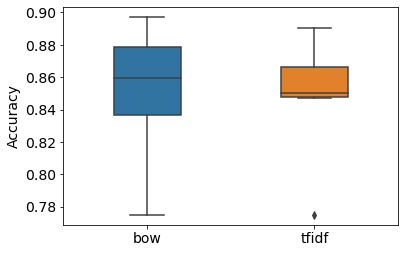

In [35]:
%matplotlib inline
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)
plt.savefig('tfidf_gridcv_results.png')

Now we can fit a logist regression model with the best parameter selected by the cross validation runned before.

In [36]:
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

Test Score with bow features 0.8887693342299933
Test Score with tf-idf features 0.8835238735709482


Here we can see the most relevant feature (i.e. the word that will impact the most on the outcome)

In [37]:
feature_names = bow_transform.get_feature_names() 
coefs_with_fns = sorted(zip(model_bow.coef_[0], feature_names)) 
df=pd.DataFrame(coefs_with_fns)
df.columns='coefficient','word'
df.sort_values(by='coefficient',ascending=False)

,coefficient,word
9338,1.509241,f a g
9337,0.789540,f u c
9336,0.675509,n i g
9335,0.628503,h i t
9334,0.563003,i g g
...,...,...
4,-0.324189,r a t
3,-0.333453,t o
2,-0.411769,i r d
1,-0.429031,a m


Now we can run some test with our two different model

In [38]:
te = ["shut the fuck up","you are a faggot dude","hello my friend","i hate you"]
t = bow_transform.transform(te)
t1 = tfidf_transform.transform(t)

In [39]:
ynew = model_bow.predict_proba(t)
ynew

array([[0.23439021, 0.75001485, 0.01559495],
       [0.0839548 , 0.90529618, 0.01074902],
       [0.02227623, 0.26035903, 0.71736473],
       [0.12022878, 0.36435868, 0.51541254]])

In [40]:
ynew = model_tfidf.predict_proba(t1)
ynew

array([[0.16128322, 0.78723039, 0.05148639],
       [0.17569906, 0.78554549, 0.03875545],
       [0.04666329, 0.50440308, 0.44893362],
       [0.12281105, 0.55971504, 0.31747391]])

In [41]:
model_bow.classes_
# 0 - hate speech 1 - offensive language 2 - neither

array([0, 1, 2], dtype=int64)

We can conclude that the BagOfWord is the model that perform better in this situation

## Sexist
Now we will train a logist regression model for sexist text classification. Since here the label are dichotomous, sklearn will select and train a simple logistic regression method to address our binary text classification problem.

In [42]:
d = pd.ExcelFile(r"ISEP Sexist Data labeling.xlsx") 

data = d.parse(0) 
data.head()

,Sentences,Label
0,"For a woman, that is good",1
1,Just dress sexy and you will sign any contract.,1
2,Are you having period ?,1
3,Stop being bitchy,1
4,I leave early because of her children instead ...,1


Now we should clean the senteces by procedding as before but now we will train also a bgrams model.

In [43]:
data['Sentiment_Cleaned'] = data.Label 
data['Tweet_Cleaned'] = list(map(clean_text, data.Sentences))

data["bigrams"] = list(map(clean_text_bigrams, data.Sentences))

data.head()

,Sentences,Label,Sentiment_Cleaned,Tweet_Cleaned,bigrams
0,"For a woman, that is good",1,1,woman good,"[(woman, good)]"
1,Just dress sexy and you will sign any contract.,1,1,dress sexy sign contract,"[(dress, sexy), (sexy, sign), (sign, contract)]"
2,Are you having period ?,1,1,period,[]
3,Stop being bitchy,1,1,stop bitchy,"[(stop, bitchy)]"
4,I leave early because of her children instead ...,1,1,leave early children instead husband,"[(leave, early), (early, children), (children,..."


We split our dataset by following the same rules applied before and we will proceed in the same way.

In [44]:
training_dataS, test_dataS = sklearn.model_selection.train_test_split(data, train_size = 0.7, random_state=42)

In [45]:
count_vectS = CountVectorizer(
    analyzer=lambda x:x
)
X_tr_bgramsS = count_vectS.fit_transform(training_dataS["bigrams"])
X_te_bgramsS = count_vectS.transform(test_dataS["bigrams"])
len(count_vectS.vocabulary_)

3821

In [46]:
bow_transformS = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False)

In [47]:
print(training_dataS.shape)
print(test_dataS.shape)

(795, 5)
(342, 5)


In [48]:
X_tr_bowS = bow_transformS.fit_transform(training_dataS['Tweet_Cleaned'])

In [49]:
len(bow_transformS.vocabulary_)

2769

In [50]:
X_tr_bowS.shape

(795, 2769)

In [51]:
X_te_bowS = bow_transformS.transform(test_dataS['Tweet_Cleaned'])

In [52]:
y_trS = training_dataS['Sentiment_Cleaned']
y_teS = test_dataS['Sentiment_Cleaned']

In [53]:
tfidf_transformS = text.TfidfTransformer(norm=None)
X_tr_tfidfS = tfidf_transformS.fit_transform(X_tr_bowS)

In [54]:
X_te_tfidfS = tfidf_transformS.transform(X_te_bowS)

In [55]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

In [56]:
model_bowS = simple_logistic_classify(X_tr_bowS, y_trS, X_te_bowS, y_teS, 'bow')
model_tfidfS = simple_logistic_classify(X_tr_tfidfS, y_trS, X_te_tfidfS, y_teS, 'tf-idf')

Test Score with bow features 0.7865497076023392
Test Score with tf-idf features 0.7456140350877193


In [57]:
model_bgramS = simple_logistic_classify(X_tr_bgramsS, y_trS, X_te_bgramsS, y_teS, 'bow')

Test Score with bow features 0.6578947368421053


In [58]:
param_gridS_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_searchS = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_gridS_)
tfidf_searchS = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_gridS_)

bgrams_searchS = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_gridS_)

In [59]:
bgrams_searchS.fit(X_tr_bgramsS, y_trS)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [60]:
bgrams_searchS.best_score_

0.6125786163522012

In [ ]:
bgrams_searchS.cv_results_

In [62]:
bow_searchS.fit(X_tr_bowS, y_trS)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [63]:
bow_searchS.best_score_

0.8012578616352201

In [64]:
bow_searchS.best_params_

{'C': 0.1}

In [ ]:
bow_searchS.cv_results_

In [66]:
tfidf_searchS.fit(X_tr_tfidfS, y_trS)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
tfidf_searchS.cv_results_

In [68]:
tfidf_searchS.best_score_

0.779874213836478

In [69]:
tfidf_searchS.best_params_

{'C': 0.1}

In [70]:
results_file = open('sexism_gridcv_results.pkl', 'wb')
pickle.dump(bow_searchS, results_file, -1)
pickle.dump(tfidf_searchS, results_file, -1)
results_file.close()

In [71]:
pkl_file = open('sexism_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
pkl_file.close()

In [72]:
bow_searchS.cv_results_['mean_test_score']

array([0.5408805 , 0.61886792, 0.80125786, 0.77735849, 0.76603774,
       0.75471698])

In [73]:

search_resultsS = pd.DataFrame.from_dict({'bow': bow_searchS.cv_results_['mean_test_score'],
                                        'tfidf': tfidf_searchS.cv_results_['mean_test_score'],
                                        'bgrams': bgrams_searchS.cv_results_['mean_test_score']})
search_resultsS

,bow,tfidf,bgrams
0,0.540881,0.540881,0.540881
1,0.618868,0.778616,0.540881
2,0.801258,0.779874,0.563522
3,0.777358,0.761006,0.602516
4,0.766038,0.742138,0.612579
5,0.754717,0.730818,0.588679


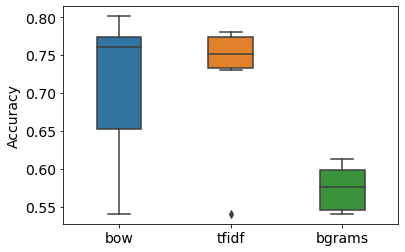

In [74]:
%matplotlib inline
ax = sns.boxplot(data=search_resultsS, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)
plt.savefig('tfidf_gridcv_results.png')

In [75]:
model_bowS = simple_logistic_classify(X_tr_bowS, y_trS, X_te_bowS, y_teS, 'bow', 
                              _C=bow_searchS.best_params_['C'])
model_tfidfS = simple_logistic_classify(X_tr_tfidfS, y_trS, X_te_tfidfS, y_teS, 'tf-idf', 
                              _C=tfidf_searchS.best_params_['C'])
model_bgramS = simple_logistic_classify(X_tr_bgramsS, y_trS, X_te_bgramsS, y_teS, 'bgrams', 
                              _C=bgrams_searchS.best_params_['C'])

Test Score with bow features 0.8070175438596491
Test Score with tf-idf features 0.7660818713450293
Test Score with bgrams features 0.6228070175438597


Now we can analyse the most relevant feature (i.e. the word that will impact the most on the outcome)

In [76]:
feature_names = count_vectS.get_feature_names() 
coefs_with_fns = sorted(zip(model_bgramS.coef_[0], feature_names)) 
df=pd.DataFrame(coefs_with_fns)
df.columns='coefficient','word'
df.sort_values(by='coefficient',ascending=False)

,coefficient,word
3820,2.226084,"(sexist, right)"
3819,2.226084,"(sexist, realist)"
3818,2.226084,"(blond, want)"
3817,1.999973,"(women, cannot)"
3816,1.969758,"(believe, women)"
...,...,...
4,-1.845930,"(good, man)"
3,-1.850283,"(opinion, valid)"
2,-2.031441,"(one, said)"
1,-2.268173,"(women, men)"


As good practice here we should check if the dataset is well balanced between different groups

In [77]:
num = data.groupby(['Sentiment_Cleaned']).count()["Tweet_Cleaned"]
num

Sentiment_Cleaned
0    513
1    624
Name: Tweet_Cleaned, dtype: int64

Now we will prepare our sentences for the sentiment detection.

In [78]:
te = [clean_text("women can't think about career"),clean_text("man and women are awesome together"),clean_text("Just dress sexy a bitch and you will get the job")]
tb = [clean_text_bigrams(clean_text("women can't think about career")),clean_text_bigrams(clean_text("man and women are awesome together")),clean_text_bigrams(clean_text("Just dress sexy and you will get the job"))]
t = bow_transformS.transform(te)
t1 = tfidf_transformS.transform(t)
t2 = count_vectS.transform(tb)

In [79]:
ynew = model_bowS.predict(t)
ynew

array([1, 1, 1], dtype=int64)

In [80]:
ynew = model_tfidfS.predict(t1)
ynew

array([1, 0, 1], dtype=int64)

In [81]:
ynew = model_bgramS.predict(t2)
ynew


array([1, 0, 1], dtype=int64)

In [82]:
model_bowS.classes_
# where "1" represents sexism and "0" represents no sexism or neutrality

array([0, 1], dtype=int64)

From the result above we may say that the bigrams model and the TF-IDF model performs equally well. But form the Test Score we can see that the TF-IDF model will perfom better, so we will chose this one as winner for this job.

## Main
Here we propose a typical pipeline for our text classifier

In [83]:
sentece1 = "I love my wife"
sentece2 = "if you want to work you must dress like a bitch"
sentece3 = "you are so retarded!"

In [84]:
sentece1

'I love my wife'

In [85]:
sentece2

'if you want to work you must dress like a bitch'

In [86]:
sentece3

'you are so retarded!'

In [87]:
te = [sentece1,sentece2,sentece3]
t = bow_transform.transform(te)
t1 = tfidf_transform.transform(t)

In [162]:
ynewBow = model_bow.predict(t)
ynewBow

array([2, 1, 1], dtype=int64)

In [163]:
ynewTf = model_tfidf.predict(t1)
ynewTf

array([1, 1, 1], dtype=int64)

In [164]:
teS = [clean_text(sentece1),clean_text(sentece2),clean_text(sentece3)]
tS = bow_transformS.transform(teS)
t1S = tfidf_transformS.transform(tS)

In [165]:
ynewS = model_tfidfS.predict(t1S)
ynewS

array([0, 1, 0], dtype=int64)

In [166]:
dS = dict(zip(te, ynewS))

In [167]:
d = dict(zip(te, ynewBow))

In [168]:
d

{'I love my wife': 2,
 'if you want to work you must dress like a bitch': 1,
 'you are so retarded!': 1}

In [169]:
dS

{'I love my wife': 0,
 'if you want to work you must dress like a bitch': 1,
 'you are so retarded!': 0}

In [170]:
for key in d:
    n = d[key]
    if n != 2: #if is offensive
        if dS[key] != 0:
            print("'"+ key + "' is OFFENSIVE and SEXIST.")
        else:
            print("'"+ key + "' is OFFENSIVE.")
    else:
        print("'"+ key + "' is NOT offensive or sexist.")

'I love my wife' is NOT offensive or sexist.
'if you want to work you must dress like a bitch' is OFFENSIVE and SEXIST.
'you are so retarded!' is OFFENSIVE.
